In [1]:
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
import os
#import glob
#import scipy.misc
#import scipy.ndimage
import numpy as np
from matplotlib import pyplot as plt
#import warnings; warnings.simplefilter('ignore')
import h5py
from skimage import io
from training_func import *
from PIL import Image
from matplotlib.colors import LogNorm

In [2]:
#HR = 64
#LR = 8
#upf = int(HR/LR)

In [3]:
#target_SupRes_train = np.load("fil/train_Nu_64Res_3L.npy")
#target_SupRes_valid = np.load("fil/val_Nu_64Res_3L.npy")

In [4]:
#target_SupRes_train = np.load("fil/val_Nu_32Res_3L.npy")
#target_SupRes_valid = np.load("fil/train_Nu_32Res_3L.npy")

In [5]:
target_SupRes_train = np.load("fil/train_Nu_16Res_3L.npy")
target_SupRes_valid = np.load("fil/val_Nu_16Res_3L.npy")

In [6]:
input_RealRes_train = np.load("fil/train_Nu_8Res_3L.npy")
input_RealRes_valid = np.load("fil/val_Nu_8Res_3L.npy")

In [7]:
HR = target_SupRes_train.shape[1]
LR = input_RealRes_train.shape[1]
upf = int(HR/LR)
print(HR, LR, upf)

16 8 2


In [8]:
input_SupRes_train = np.asarray([MakeCron(x[:,:,0],upf) for x in input_RealRes_train])
input_SupRes_valid = np.asarray([MakeCron(x1[:,:,0],upf) for x1 in input_RealRes_valid])

input_SupRes_train = np.expand_dims(input_SupRes_train,axis=3)
input_SupRes_valid = np.expand_dims(input_SupRes_valid,axis=3)

In [9]:
frac_SupRes_train = target_SupRes_train / input_SupRes_train
frac_SupRes_valid = target_SupRes_valid / input_SupRes_valid

frac_SupRes_train[np.where(np.isnan(frac_SupRes_train))]=0#1./(upf**2)
frac_SupRes_valid[np.where(np.isnan(frac_SupRes_valid))]=0#1./(upf**2)

/Users/lox/opt/anaconda3/envs/piton3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/lox/opt/anaconda3/envs/piton3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


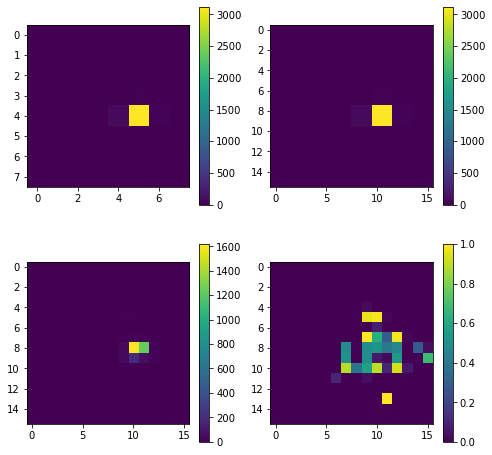

In [10]:
ev = 13
plt.figure(figsize=(8,8))

plt.subplot(221)
plt.imshow(input_RealRes_valid[ev,:,:,0])
plt.colorbar()

plt.subplot(222)
plt.imshow(input_SupRes_valid[ev,:,:,0])
plt.colorbar()

plt.subplot(223)
plt.imshow(target_SupRes_valid[ev,:,:,0])
plt.colorbar()

plt.subplot(224)
plt.imshow(frac_SupRes_valid[ev,:,:,0])
plt.colorbar()

plt.show()

In [11]:
from keras.backend import sigmoid
import tensorflow as tf
from keras.layers import Lambda, UpSampling2D, ZeroPadding2D
from keras import backend as K, Sequential
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten, Add, Reshape
from keras.layers import Input, Concatenate
from keras.models import Model


#image = Input((HR, HR, 1), name = "Input")
image = Input((LR, LR, 1), name = "Input")

#### === UPCONV === #####


x = Conv2D(16, (4, 4), activation="relu", padding="same",name="Up1")(image)
x = Conv2D(32, (4, 4), activation="relu", padding="same",name="Up2")(x)
x = Conv2D(128, (4, 4), activation="relu", padding="same",name="Up3")(x)
#x = Conv2D(64, (3, 3), activation="relu", padding="same",name="Up4")(x)
#x = Conv2D(32, (3,3), activation="relu", padding="same",name="Up5")(x)
#x = Conv2D(64, (3,3), activation="relu", padding="same",name="Up6")(x)
#x = Conv2D(128,(3, 3), activation="relu", padding="same",name="Up5")(x)
#x = Conv2D(256,(3, 3), activation="relu", padding="same",name="Up6")(x)

#SR =Lambda(lambda x:tf.nn.depth_to_space(x,block_size=upf), name = "PS_S")(x)
SR = Reshape((HR,HR, -1))(x)

### === SRCNN === ###
#inter_image = Input((64, 64, 1), name = "InputSR")

x = Conv2D(64, (2, 2), activation='relu', padding='same', name = "PERep")(SR)
x = Conv2D(32, (2, 2), activation='relu', padding='same', name = "NLM")(x)
#x = Conv2D(128, (3, 3), activation='relu', padding='same', name = "NLM1")(x)
#x = Conv2D(48, (3, 3), activation='relu', padding='same', name = "NLM2")(x)
#srcnn = Dense(1, activation='relu', name ="Rec")(x)
#print(HR)
#srcnn = Reshape((HR,HR, -1))(srcnn)
srcnn = Conv2D(1, (2, 2), activation='relu', padding='same', name = "Rec")(x)
#srcnn = Flatten()(srcnn)
#srcnn = Dense(HR**2, activation='relu', name ="Rec1")(srcnn)
#srcnn = Reshape((HR,HR, -1))(srcnn)







Using TensorFlow backend.
/Users/lox/opt/anaconda3/envs/piton3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lox/opt/anaconda3/envs/piton3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lox/opt/anaconda3/envs/piton3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/lox/opt

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 8, 8, 1)           0         
_________________________________________________________________
Up1 (Conv2D)                 (None, 8, 8, 16)          272       
_________________________________________________________________
Up2 (Conv2D)                 (None, 8, 8, 32)          8224      
_________________________________________________________________
Up3 (Conv2D)                 (None, 8, 8, 128)         65664     
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16, 32)        0         
_________________________________________________________________
PERep (Conv2D)               (None, 16, 16, 64)        8256      
_________________________________________________________________
NLM (Conv2D)                 (None, 16, 16, 32)        8224

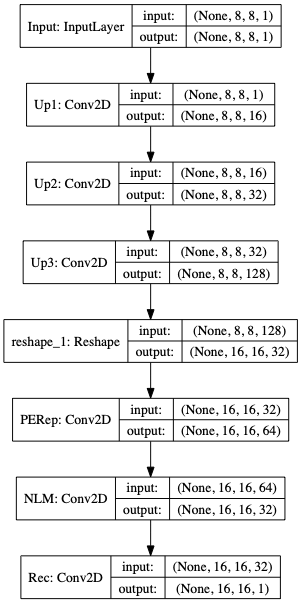

In [12]:
model = Model(inputs=image, outputs=srcnn)
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,rankdir="TB", dpi = 70)


In [13]:
import keras.backend as kb


def normalization(o):
        HR = o.shape[1]
        LR = 8#i.shape[1]
        upf = int(HR/LR)
        AA = []
        for X in range(LR):
            for Y in range(LR):
                A = []
                for xi in range(upf):
                    for yi in range(upf):
                        A.append(o[:,upf*X+xi,upf*Y+yi,0])
                A=tf.stack(A, axis = 1)
                A=tf.reshape(A,(-1, upf*upf))
                A=kb.sum(A, axis=1)
                AA.append(A)
        AA=tf.stack(AA, axis = 1)
        AA=tf.reshape(AA,(-1, LR,LR))
        B=[]
        for xx in range(HR):
            for yy in range(HR):
                x1 = xx//upf
                y1 = yy//upf
                SS = o[:,xx,yy,0]/AA[:,x1,y1]
                SS = tf.where(AA[:,x1,y1]==0., 0., SS)
                B.append(SS)
                
        B=tf.stack(B, axis=1)
        B=tf.reshape(B, (-1, HR, HR, 1))
        B = tf.where(tf.math.is_nan(B), 1./(upf**2), B)
        B = tf.where(tf.math.is_inf(B), 1./(upf**2) , B)
        return B

In [14]:
pred_stand = model.predict(input_RealRes_valid)
#pred_stand = model.predict(input_SupRes_valid)
print(pred_stand.shape)
out = normalization(pred_stand)# , input_SupRes_valid)


(4000, 16, 16, 1)


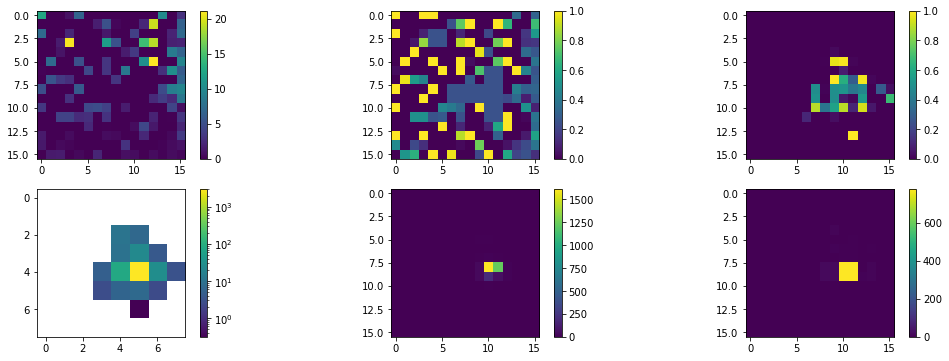

In [15]:
ev = 13
plt.figure(figsize=(18,6))
plt.subplot(231)
plt.imshow(pred_stand[ev,:,:,0])
plt.colorbar()

plt.subplot(232)
plt.imshow(out[ev,:,:,0])
plt.colorbar()

plt.subplot(233)
plt.imshow(frac_SupRes_valid[ev,:,:,0])
plt.colorbar()

plt.subplot(234)
plt.imshow(input_RealRes_valid[ev,:,:,0], norm =LogNorm())
plt.colorbar()

plt.subplot(235)
plt.imshow(target_SupRes_valid[ev,:,:,0])
plt.colorbar()

plt.subplot(236)
plt.imshow((out*input_SupRes_valid)[ev,:,:,0])
plt.colorbar()

plt.show()

In [16]:
import keras.backend as kb

#def myloss(image):
    #print(image.shape)
def int_loss( tar_,pred_):
        
        pred = normalization(pred_)#, image)
        #tar = tf.where(pred<=0.,0.,tar_)
        #print(tar.shape)
        tar = tar_
        #tar = tf.where(tar_<=0., 0., tar_)
        #pred = tf.where(tar_<=0., 0., pred)
        
        tot = kb.sum(tar)
        
        cell = kb.sum((pred-tar)*(pred-tar))
        cell /= (tot)
        
        return  cell #+ ep * ev
    #return int_loss

model.compile(loss=int_loss, optimizer="adam")
#myloss(image)

In [18]:
#print(int_loss(target_SupRes_valid,pred_stand))

In [19]:
NEP_max = 1000
#opt = Adam(learning_rate=0.0001)

VL = np.zeros(NEP_max)
TL = np.zeros(NEP_max)

k = 0
TL_min = float("inf")
VL_min = float("inf")


for epoch in range(NEP_max):
    print("Epoch: ===== ", epoch)
    history = model.fit(x=input_RealRes_train,y=frac_SupRes_train,
                        batch_size=50,
                        epochs=1,
                        validation_data=[input_RealRes_valid, frac_SupRes_valid])

    VL_ =history.history["val_loss"][0]
    TL_ =history.history["loss"][0]
    VL[epoch] = VL_
    TL[epoch] = TL_
    
    if TL_>= TL_min:
        k+=1
    if TL_< TL_min:
        k = 0
        TL_min = TL_
        
    if VL_<TL_*(1+0.05)/(1-0.05) and k <4:
        model.save("model.hdf5")
        continue
    
    break
    

Epoch: =====  0
Train on 16000 samples, validate on 4000 samples
Epoch 1/1
16000/16000 [==============================] - 53s 3ms/step - loss: 1.3011 - val_loss: 1.2912
Epoch: =====  1
Train on 16000 samples, validate on 4000 samples
Epoch 1/1
16000/16000 [==============================] - 41s 3ms/step - loss: 1.2986 - val_loss: 1.2912
Epoch: =====  2
Train on 16000 samples, validate on 4000 samples
Epoch 1/1
16000/16000 [==============================] - 38s 2ms/step - loss: 1.2985 - val_loss: 1.2912
Epoch: =====  3
Train on 16000 samples, validate on 4000 samples
Epoch 1/1
16000/16000 [==============================] - 39s 2ms/step - loss: 1.2985 - val_loss: 1.2912
Epoch: =====  4
Train on 16000 samples, validate on 4000 samples
Epoch 1/1
16000/16000 [==============================] - 42s 3ms/step - loss: 1.2988 - val_loss: 1.2912
Epoch: =====  5
Train on 16000 samples, validate on 4000 samples
Epoch 1/1
16000/16000 [==============================] - 41s 3ms/step - loss: 1.2984 - val

In [21]:
#import tensorflow as tf
#from keras.models import load_model
#model = load_model("model.hdf5")

In [21]:
f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(10,8))

#a0.title("BICUBIC Loss")
a0.plot(TL,label="Training Loss")
a0.plot(VL, label="Validation Loss")
a0.axis(xmin=0,xmax=int(epoch),ymin=0,ymax=1.5)
a0.xaxis.set_visible(False)
a0.legend(loc = "lower left", fontsize = 17)

a1.plot(2*(VL-TL)/(TL+VL))
a1.axis(xmin=0,xmax=int(epoch))
f.show()



/Users/lox/opt/anaconda3/envs/piton3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/lox/opt/anaconda3/envs/piton3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


In [22]:
from training_func import *
from math import *
from sklearn.cluster import KMeans
from matplotlib.colors import LogNorm

In [23]:

#y_ = np.load("fil/val_Nu_SupRes_3L.npy")
#y_ = np.expand_dims(y_[: ,1,:HR,:HR], axis=3)
#
#x_small_ = np.load("fil/val_Nu_RealRes_3L.npy")
#x_small_ = np.expand_dims(x_small_[: ,1,:LR,:LR], axis=3)

f = h5py.File("fil/truth_info_3L.h5","r")
orX = f["Ev_X_or"]
orY = f["Ev_Y_or"]


In [24]:
pred_new = model.predict(input_RealRes_valid)
out = normalization(pred_new)

In [25]:
#pred_new*=input_SupRes_valid
#pred_new.shape

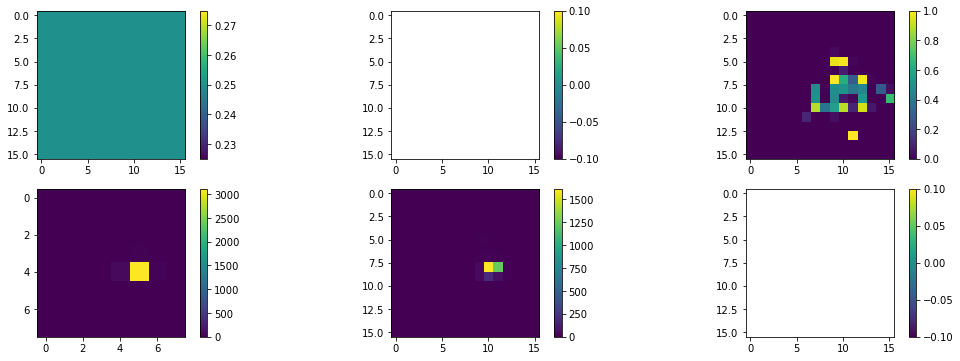

In [26]:
ev = 13
plt.figure(figsize=(18,6))
plt.subplot(231)
plt.imshow(out[ev,:,:,0])
plt.colorbar()

plt.subplot(232)
plt.imshow(pred_new[ev,:,:,0])
plt.colorbar()

plt.subplot(233)
plt.imshow(frac_SupRes_valid[ev,:,:,0])
plt.colorbar()

plt.subplot(234)
plt.imshow(input_RealRes_valid[ev,:,:,0])
plt.colorbar()

plt.subplot(235)
plt.imshow(target_SupRes_valid[ev,:,:,0])
plt.colorbar()

plt.subplot(236)
plt.imshow((pred_new*input_SupRes_valid)[ev,:,:,0])
plt.colorbar()



In [27]:
print()
NN = y_8_val.shape[0]
MER = np.zeros(NN)
#print(x_small_.shape)

for ev in range(NN):
    
    if ev%200==0: print("Ev: ==== ",ev)
    
    loc = np.where(y_8_val[ev,:,:,0]>0.)
    
    
    if len(loc[0])<1: 
        MER[ev]=-1
        print(ev)
        continue
        
    suploc = Make_Sup_Loc(loc,8)
    
    EML=np.sum(pred[ev,:,:,0])
    ETR=np.sum(y_64_val[ev,:,:,0])
    

    MER[ev]=(EML-ETR)/ETR

    



Ev: ====  0
Ev: ====  200
Ev: ====  400
Ev: ====  600
Ev: ====  800
Ev: ====  1000
Ev: ====  1200
Ev: ====  1400
Ev: ====  1600
Ev: ====  1800
Ev: ====  2000
Ev: ====  2200
Ev: ====  2400
Ev: ====  2600
Ev: ====  2800
Ev: ====  3000
Ev: ====  3200
Ev: ====  3400
Ev: ====  3600
Ev: ====  3800
3949


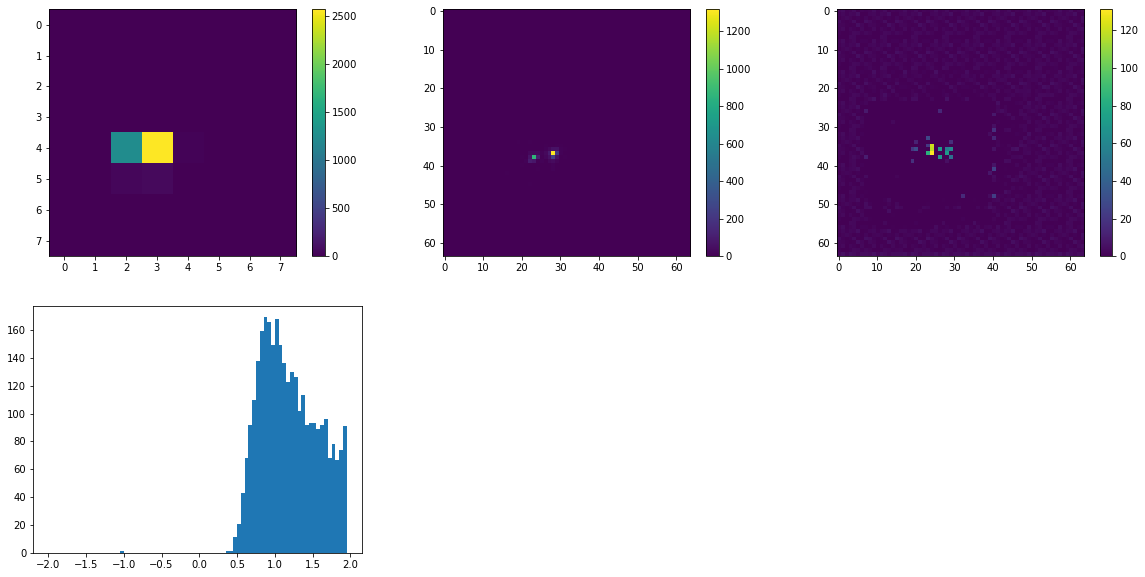

In [28]:
ev = 12
plt.figure(figsize=(20,10))

loc = np.where(y_8_val[ev,:,:,0]>0.)


plt.subplot(231)
plt.imshow(y_8_val[ev,:,:,0])
plt.colorbar()

plt.subplot(232)
plt.imshow(y_64_val[ev,:,:,0])
plt.colorbar()

plt.subplot(233)
plt.imshow(pred[ev,:,:,0])
plt.colorbar()

plt.subplot(234)
plt.hist(MER, bins = np.arange(-2,2, 0.05))

plt.show()

In [32]:
T =np.sum(y_target_val[ev,:,:,0])
P = np.sum(pred[ev,:,:,0])
print(P, T, (P-T))



NameError: name 'y_target_val' is not defined

In [22]:
plt.figure(figsize=(20,10))

ev = 10

loc = np.where(y_test[ev,:,:,0]>0.)
plt.subplot(231)
plt.imshow(x_test_small[ev,:,:,0])
plt.colorbar()

plt.subplot(232)
plt.imshow(y_test[ev,:,:,0])
plt.colorbar()


A = np.zeros((pred.shape[1],pred.shape[2]))
A[loc] = pred[ev,:,:,0][loc]
plt.subplot(233)
plt.imshow(A)
plt.colorbar()

plt.subplot(234)
plt.hist(MER, bins = np.arange(-2,2, 0.05))

plt.show()

NameError: name 'y_test' is not defined

<Figure size 1440x720 with 0 Axes>

In [ ]:
NEvent = 4000
num_L = 6
print("Num events: ", NEvent, " Num lays: ",num_L)

X0 = 3.897
LI = 17.438

depth=np.asarray([3*X0, 16*X0, 6*X0, 1.5*LI, 4.8*LI, 1.8*LI])
orig = 150.

tr_dim = 125.

Z_L=np.asarray([150+np.sum(depth[:l]) for l in range( num_L )])
Z_L[3:]+=1

print("Position beginning of layers: ", Z_L)

def inv_mass(momentum):    
    a = momentum[0]**2-momentum[1]**2-momentum[2]**2-momentum[3]**2
    if a < 0:
        return -1
    else:
        return sqrt(a)


mass_64 = np.zeros(NEvent)
mass_8  = np.zeros(NEvent)

thet_64 = np.zeros(NEvent)
thet_8 = np.zeros(NEvent)

for ev in range(NEvent):
    if ev % 50 == 0: print("-- Ev ",ev," --")

    pt_64 =[0,0,0,0]
    pt_8  =[0,0,0,0]

    pos_64 = []
    ene_64 = []

    pos_8 = []
    ene_8 = []

    or_X = orX[ev]
    or_Y = orY[ev]
    #print(or_X, or_Y)
    
    for l in range( 1 ):

        l=1
        Lay_64 = pred[ev,:,:,0]
        Lay_8  = x_small_[ev,:,:,0]

        DZ = Z_L[l]

        for X in range(64):
            for Y in range(64):
                
                Cell = Lay_64[X][Y]
                if Cell !=0 :
                    pos_64.append( [conv_to_cm(X, 64), conv_to_cm(Y, 64), DZ/300.] )
                    ene_64.append( Cell )

                
                if X <8 and Y<8:
                    Cell = Lay_8[X][Y]
                    if Cell !=0:
                        pos_8.append( [conv_to_cm(X, 8), conv_to_cm(Y, 8), DZ/300.] )
                        ene_8.append( Cell )

    ## 64         
    kmean_64 = KMeans(n_clusters=2, init='k-means++', max_iter=1000, n_init=100, random_state=0)
    predi_64 = kmean_64.fit(pos_64, sample_weight = ene_64)
    
    ene_64=np.asarray(ene_64)
    ph_1 = kmean_64.cluster_centers_[0]
    ph_2 = kmean_64.cluster_centers_[1]

    #DR_64[ev] = sqrt( (ph_1[0]-ph_2[0])**2 + (ph_1[1]-ph_2[1])**2 + (ph_1[2]-ph_2[2])**2)

    #print(ph_1,"\n",ph_2,"\n")

    DX1 = ph_1[0] - or_X
    DY1 = ph_1[1] - or_Y
    DZ1 = ph_1[2]*300.

    DX2 = ph_2[0] - or_X
    DY2 = ph_2[1] - or_Y
    DZ2 = ph_2[2]*300.

    r1 = sqrt(DX1**2 + DY1**2 + DZ1**2)
    r2 = sqrt(DX2**2 + DY2**2 + DZ2**2)

    thet_64[ev] = (DX1*DX2+DY1*DY2+DZ1*DZ2)/(r1*r2)
    
    E_ph_1 = np.sum(ene_64[np.where(predi_64.labels_==1)])
    E_ph_2 = np.sum(ene_64[np.where(predi_64.labels_==0)])
    
    #print("Energies \n")
    #print(ev, "E1 ",E_ph_1, "E2", E_ph_2, "Etot", E_ph_1+E_ph_2)
    #print(ph_1,"\n",ph_2,"\n")   
    
    pt_64[0] = E_ph_1            + E_ph_2
    pt_64[1] = E_ph_1 * DX1 / r1 + E_ph_2 * DX2 / r2
    pt_64[2] = E_ph_1 * DY1 / r1 + E_ph_2 * DY2 / r2
    pt_64[3] = E_ph_1 * DZ1 / r1 + E_ph_2 * DZ2 / r2

    ## 32         
    kmean_8 = KMeans(n_clusters=2, init='k-means++', max_iter=1000, n_init=100, random_state=0)
    predi_8 = kmean_8.fit(pos_8, sample_weight = ene_8)
    
    ene_8=np.asarray(ene_8)
    ph_1 = kmean_8.cluster_centers_[0]
    ph_2 = kmean_8.cluster_centers_[1]

    #DR_8[ev] = sqrt( (ph_1[0]-ph_2[0])**2 + (ph_1[1]-ph_2[1])**2 + (ph_1[2]-ph_2[2])**2)

    DX1 = ph_1[0] - or_X
    DY1 = ph_1[1] - or_Y
    DZ1 = ph_1[2]*300.

    DX2 = ph_2[0] - or_X
    DY2 = ph_2[1] - or_Y
    DZ2 = ph_2[2]*300.

    r1 = sqrt(DX1**2 + DY1**2 + DZ1**2)
    r2 = sqrt(DX2**2 + DY2**2 + DZ2**2)

    thet_8[ev] = (DX1*DX2+DY1*DY2+DZ1*DZ2)/(r1*r2)

    E_ph_1 = np.sum(ene_8[np.where(predi_8.labels_==1)])
    E_ph_2 = np.sum(ene_8[np.where(predi_8.labels_==0)])
    
    #print("Energies \n")
    #print(ev, "E1 ",E_ph_1, "E2", E_ph_2, "Etot", E_ph_1+E_ph_2)
    #print(ph_1,"\n",ph_2,"\n")   
    
    pt_8[0] = E_ph_1            + E_ph_2
    pt_8[1] = E_ph_1 * DX1 / r1 + E_ph_2 * DX2 / r2
    pt_8[2] = E_ph_1 * DY1 / r1 + E_ph_2 * DY2 / r2
    pt_8[3] = E_ph_1 * DZ1 / r1 + E_ph_2 * DZ2 / r2
    
    
    mass_64[ev] = inv_mass(pt_64)
    mass_8[ev]  = inv_mass(pt_8)
    print("{},{}\r".format(mass_64[ev], mass_8[ev]),end="")

In [ ]:
plt.hist(thet_64, color="darkred", alpha = 0.6, bins = np.arange(0.01,0.5,.01))
plt.hist(thet_8, color="darkblue", alpha = 0.6, bins = np.arange(0.01,0.5,.01))
plt.show()